# Segmenting and Clustering Neighborhoods in Toronto - PART 3

In [2]:
# Import needed libraries
import pandas as pd 
import numpy as np 
print('libraries imported!')

libraries imported!


In [3]:
# Load table into a dataframe
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_table = pd.read_html(url,skiprows=1)[0]

# Apply table headers as described by the activity instructions
df_table.columns = ['PostalCode', 'Borough', 'Neighborhood']

In [4]:
# Show raw dataframe - Now it still contains 'Non assigned' and NaN data. 
df_table.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [11]:
# Removes the 'Not Assigned' and missing values
df_table = df_table[df_table.Borough != 'Not assigned']

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
for index, row in df_table.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']
        
# Group the dataset by PostalCode and Borough.
df_table = df_table.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# Show the cleansed dataframe
df_table.head()        

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [12]:
# END PART I

# Print the number of rows of your dataframe.
df_table.shape

(103, 3)

In [7]:
# Install needed libraries
!pip install shapely
!pip install geopandas
print('Libraries installed!')

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
Libraries installed!


In [8]:
# Import needed libraries
import requests
import io
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
print('Libraries imported and environment set up!')

Libraries imported and environment set up!


In [9]:
# Load latitude and the longitude coordinates of each neighborhood.
url2="http://cocl.us/Geospatial_data"
s=requests.get(url2).content
df_coordinates=pd.read_csv(io.StringIO(s.decode('utf-8')))

# Rename the first column to allow merging dataframes on Postcode
df_coordinates.columns = ['PostalCode', 'Latitude', 'Longitude']

# Show a sample of the df_coordinates dataframe
df_coordinates.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
# END PART II

# Join the Neighborhoods and Coordinates datasets
df_table = pd.merge(df_table,df_coordinates,on='PostalCode')

# Select data and clean up dataframe variable
df_table = df_table[['PostalCode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]

# Show a sample of the df_table dataframe
df_table.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


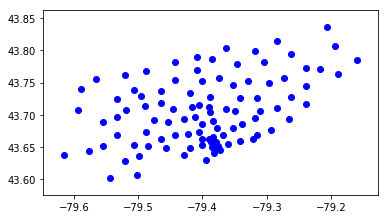

In [14]:
# END PART III

# Load latitude and longitude into geopandas dataframe
df_table['Coordinates'] = list(zip(df_table.Longitude,df_table.Latitude))
df_table['Coordinates'] = df_table['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df_table, geometry='Coordinates')

# Set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(color='white', edgecolor='black')

# Plot and show data
gdf.plot(ax=ax, color='b')
plt.show()